<a href="https://colab.research.google.com/github/dSudario9/Modelos-Supervisionados-Diversos/blob/main/Regressao_Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1 - Regressao Linear Simples

Quando utilizamos os modelos de Regressão? Quando queremos prever uma variável contínua, isto é, um valor numérico.

Nesse exercício de hoje, iremos aprender um pouco mais sobre a biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) utilizando um dataset próprio dela para aplicarmos dentro do modelo de Regressão Linear.

Em linhas gerais, o objetivo do exercício é você desenvolver um modelo de Regressão Linear **SIMPLES** (Apenas uma variável de entrada X e uma de saída Y) para modelar a precificação de casas em Boston nos Estados Unidos. 

Neste exercício você irá:
- Importar os dados e criar o Dataframe;
- Realizar um EDA
- Escolher 3 atributos para utilizar como X do modelo
- Treinar o modelo de Regressão Linear simples para cada atributo e avaliar qual melhor modelo.

Para acessar esses dados, basta seguir o passo a passo abaixo.

In [1]:
# Importação do dataset Boston House Pricing

from sklearn.datasets import load_boston #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Dando uma olhada mais a fundo no tipo do dataset, vemos que ele é um *sklearn.utils.Bunch*, uma espécie de objeto do sklearn. Em seguida, acessaremos seus atributos e veremos o que eles significam.

In [2]:
# Verificando os atributos do objeto
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
# Acessando o atributos do objeto
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Dentro dos atributos, vemos que o dataset é composto são:
- 'data': Os dados numéricos do dataset;
- 'target': A variável alvo (O que queremos prever);
- 'feature_names': Nome das colunas;
- 'DESCR': Esse vocês irão acessar e descobrir;
- 'filename': Esse vocês irão acessar e descobrir.

Os pŕoximos passos agora é com você!

### 1 - 0 Criação do DataFrame


In [4]:
# Importação das bibliotecas
import pandas as pd

''' Descrições das colunas (Fornecidos no dataset['feature_names'])
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
'''

# Montagem do dataframe
df = pd.DataFrame(dataset.get('data'),columns=dataset.get('feature_names'))
df["PRICE"] = dataset.get('target')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Você deve então, com esse Dataset formado Escolher 3 dos 13 atributos para criar 3 modelos e averiguar qual destes é melhor para prever o Preço da casa. Como deve-se fazer isso? **EDA**

## 1 - 1 Importação das bibliotacas 

In [5]:
# Importação das bibliotecas basicas

import pandas as pd
import numpy as np

#Bibliotecas usandas pra criar o modelo.

from sklearn.linear_model import LinearRegression #Ref: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn import metrics
# Bibliotecas de Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.simplefilter("ignore")

## 1 - 2 EDA   = Exploratory Data Analysis

Você deve escolher quais serão as 3 melhores colunas para utilizarmos através do EDA e não treinando 13 modelos.

### Primeiro contato

- Head
- Describe
- Info/ Valores ausentes

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

### Análise Gráfica

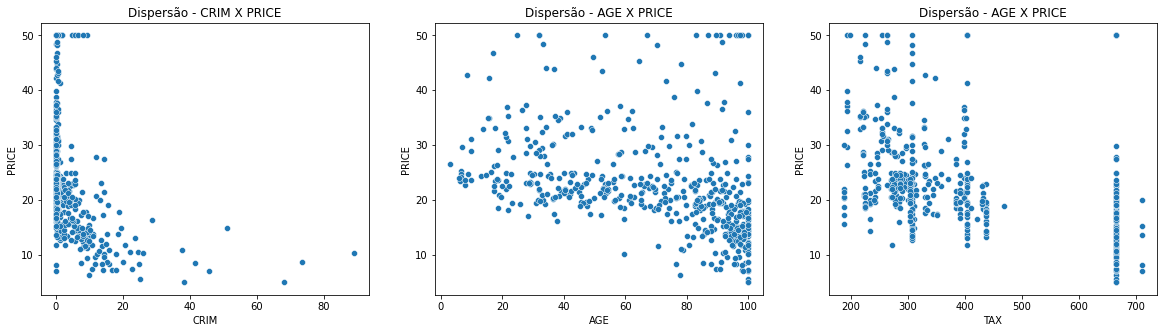

In [10]:
# Exploração dos dados de maneira visual, para ver quais 
#que provavelmente irão apresentar uma correlação (Não é o melhor método, mas é válido)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='CRIM', y='PRICE' ,data=df)
plt.title("Dispersão - CRIM X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='AGE', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='TAX', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")

plt.show()

### Gráfico de correlação e escolha do atributo

De todas as colunas do nosso Dataset, quais aqueles que provavelmente terá melhor desempenho no modelo? Aqueles que terão maior correlação com o Preço da casa (Tanto positiva quanto negativa)

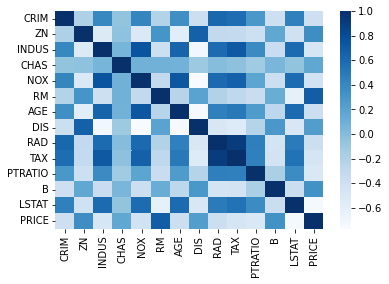

In [11]:
sns.heatmap(df.corr(),cmap="Blues")

In [12]:
df.corr()['PRICE'].abs().sort_values(ascending=False)

PRICE      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64

Baseado na análise de correlação, escolha 3 variáveis para utilizarmos como parâmetro de treinamento são:
RESPOSTA:
- LSTAT      0.737663
- RM         0.695360
- PTRATIO    0.507787

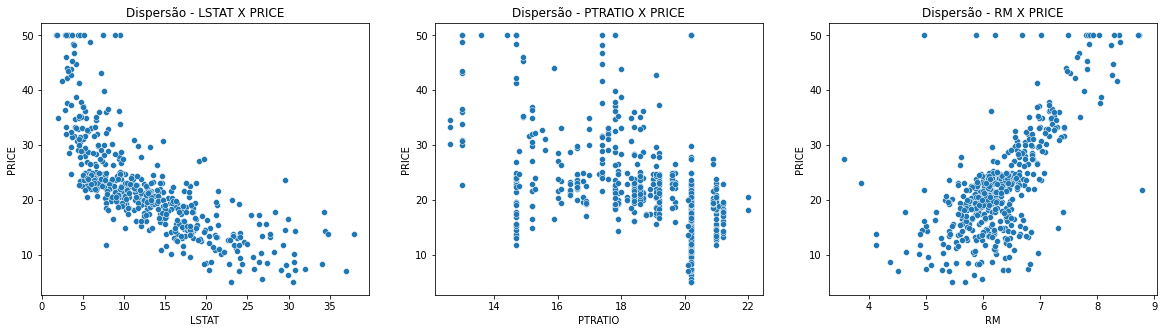

In [13]:
# Realizando a construção do gráfico de dispersão para os escolhidos

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='LSTAT', y='PRICE' ,data=df)
plt.title("Dispersão - LSTAT X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='PTRATIO', y='PRICE' ,data=df)
plt.title("Dispersão - PTRATIO X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='RM', y='PRICE' ,data=df)
plt.title("Dispersão - RM X PRICE")
plt.show()

### Comparação dos gráficos de dispersão

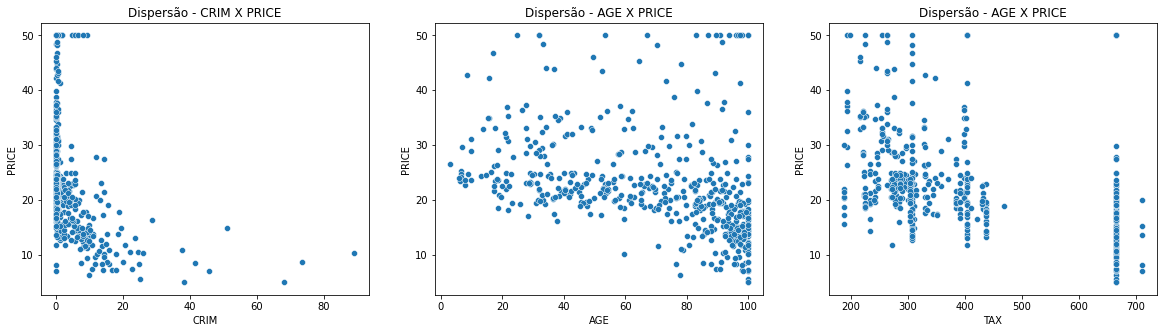

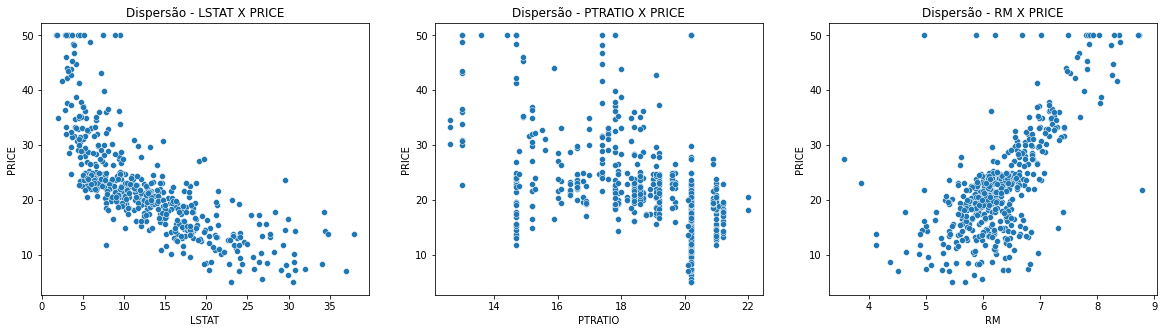

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='CRIM', y='PRICE' ,data=df)
plt.title("Dispersão - CRIM X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='AGE', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='TAX', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='LSTAT', y='PRICE' ,data=df)
plt.title("Dispersão - LSTAT X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='PTRATIO', y='PRICE' ,data=df)
plt.title("Dispersão - PTRATIO X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='RM', y='PRICE' ,data=df)
plt.title("Dispersão - RM X PRICE")

plt.show()

Observando o gráfico de cima com os de baixo, é possível perceber uma maior lineariedade com os valores de baixo.

## 1 - 3 Separação Treino X Teste

In [15]:
# Separar os valores de atributo e alvo

X = df[['LSTAT','RM','PTRATIO']]
y = df['PRICE']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
X_train.head()

,LSTAT,RM,PTRATIO
318,10.36,6.382,18.4
360,7.79,6.398,20.2
239,7.37,6.606,16.6
365,7.12,3.561,20.2
382,23.60,5.536,20.2


## 1 - 4 Treinamentos e validação dos modelos

Atentar-se ao fato de que estamos analisando apenas modelos **SIMPLES** isto é um X e um Y

### Treinar o modelo

In [21]:

# Chamar a função do Modelo para cada variável
LinReg1 = LinearRegression() # Para o LSTAT
LinReg2 = LinearRegression() # Para o RM
LinReg3 = LinearRegression() # Para o PTRATIO

Tenta achar um jeito de resolver esse erro **ValueError** em baixo.

In [24]:
# Treinar o modelo
LinReg1.fit (X_train,y_train )

LinearRegression()

In [ ]:
# Treinar o modelo

LinReg1.fit(X_train['LSTAT'].values.reshape(-1,1),y_train)

### Calcular as métricas

- Fórmula da regressão
- MSE
- RMSE
- R²

In [ ]:


# Predizer os valores de teste

y_pred_1 = LinReg1.predict(X_test['LSTAT'].values.reshape(-1,1))


# Calcular as métricas do modelo

print("Fórmula: y = {} {} x".format(LinReg1.intercept_,LinReg1.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_1)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_1)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_1)))


### Criar uma visualização do modelo


In [ ]:

y_pred_total = LinReg1.predict(X['LSTAT'].values.reshape(-1,1))
plt.scatter('LSTAT','PRICE',data=df,label='Real')
plt.plot(df['LSTAT'],y_pred_total,label='Previsto',color='R')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável LSTAT')
plt.legend()

plt.show()

### Repetir procedimento

Realizar o mesmo procedimento para as outras 2 variáveis

In [ ]:
# Treinar o modelo

LinReg2.fit(X_train['RM'].values.reshape(-1,1),y_train)

# Predizer os valores de teste

y_pred_2 = LinReg2.predict(X_test['RM'].values.reshape(-1,1))


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg2.intercept_,LinReg2.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_2)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_2)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_2)))

y_pred_total = LinReg2.predict(X['RM'].values.reshape(-1,1))
plt.scatter('RM','PRICE',data=df,label='Real')
plt.plot(df['RM'],y_pred_total,label='Previsto',color='R')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável RM')
plt.legend()

plt.show()


In [ ]:
# Treinar o modelo

LinReg3.fit(X_train['PTRATIO'].values.reshape(-1,1),y_train)

# Predizer os valores de teste

y_pred_3 = LinReg3.predict(X_test['PTRATIO'].values.reshape(-1,1))


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg3.intercept_,LinReg3.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_3)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_3)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_3)))


y_pred_total = LinReg3.predict(X['PTRATIO'].values.reshape(-1,1))
plt.scatter('PTRATIO','PRICE',data=df,label='Real')
plt.plot(df['PTRATIO'],y_pred_total,label='Previsto',color='R')
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável RM')
plt.legend()

plt.show()


## 1 - 5 Qual o melhor modelo?

Analise graficamente e com as métricas para chegar na conslusão.

In [ ]:
# Chamar a função do Modelo
LinReg = LinearRegression() # Para o LSTAT


for i in X.columns:
  # Treinar o modelo
  LinReg.fit(X_train[i].values.reshape(-1,1),y_train)

  # Predizer os valores de teste
  y_pred = LinReg.predict(X_test[i].values.reshape(-1,1))

  # Calcular as métricas do modelo
  print("Fórmula: y = {} {} x".format(LinReg.intercept_,LinReg.coef_[0]))
  print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
  print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
  print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

  #X_norm = scaler.transform(X[i])

  y_pred_total = LinReg.predict(X[i].values.reshape(-1,1))
  plt.scatter(X_train[i],y_train,label='Real')
  plt.plot(X[i],y_pred_total,label='Previsto',color='R')
  plt.xlabel(i)
  plt.ylabel('PRICE')
  plt.title('Previsão de preço de imóveis em Boston utilizando a variável ' + i)
  plt.legend()

  plt.show()


O melhor modelo é aquele que utiliza o LSTAT.

# 2 - Regressao Linear Categórica

O dataset de hoje é o [Price Car](https://github.com/rmadan16/LinearRegression_CarPrice). Um dataset disponibilizado por [Rohit Madan](https://medium.com/@madanflies/linear-regression-on-carprice-dataset-or-encoding-a-categorical-dataset-in-linear-regression-7378f207e5c1). Para importar ele, basta utilizar o link: https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv' ou baixar o csv e fazer o upload no colab.

Ele contém a informação sobre a venda de carros usados e informações do carro como:
- Nome do carro
- Tipo de Combustível
- Número de portas
- Comprimento / Largura / Altura
- Outros variáveis
- Preço de venda

Nesse exercício você deverá aplicar o conceito de transformação categórica na coluna de **carbody** e desenvolver um modelo de Regressão Linear e avaliar seu desempenho.

## 2 - 0 Importação da bibliotecas

In [ ]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression #Ref: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")


## 2 - 1 Criação do DataFrame filtragem da coluna

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv')
df.head()

In [ ]:
df = df[['carbody','price']]

2 - 2 Distribuição do preço de acordo com o carbody

In [ ]:
df[['carbody']].value_counts()

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
sns.displot(data = df,
            x = 'price',
            col = 'carbody',
            col_wrap = 3,
            kind = 'kde')

plt.show()

## 2 - 2 Transformações da variável categórica 

### Usando o get_dummies do pandas

In [ ]:
df_tf = pd.get_dummies(df['carbody'])
df_tf['price'] = df['price']
df_tf.head()

### Usando o OneHotEncoder

Nota o dataframe final deste modelo deve ser igual ao do get_dummies

In [ ]:
## one hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df['carbody'].values.reshape(-1,1))

In [ ]:
df_tf = pd.DataFrame(enc.transform(df['carbody'].values.reshape(-1,1)).toarray().astype(int),columns=enc.categories_)
df_tf['price'] = df['price']
df_tf.head()

In [ ]:
df_tf.head()

## 2 - 3 Treinamento e validação do modelo

### Separar Treino X Teste

In [ ]:
# Separar os valores de atributo e alvo

X = df_tf.iloc[:,:-1]
y = df_tf[['price']]

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


### Treinar modelo

In [ ]:
# Chamar a função do Modelo para cada variável
LinReg1 = LinearRegression()

# Treinar o modelo

LinReg1.fit(X_train,y_train)

# Predizer os valores de teste

y_pred_1 = LinReg1.predict(X_test )


### Calcular métricas do modelo

In [ ]:
# Calcular as métricas do modelo

print("Fórmula: y = {} {} x".format(LinReg1.intercept_,LinReg1.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_1)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_1)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_1)))

# 3 - Ordinary Least Squares

Este [dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) é um conjunto de dados fornecidos no [Kaggle](https://www.kaggle.com/), uma plataforma voltada a competição de programação e acesso à conjunto de dados de todo o mundo. É totalmente gratuito e apresenta uma forte comunidade de Cientistas de Dados e Machine Learning.

Sobre os dados, eles foram criados coletando dados sobre o consumo de cerveja na cidade de São Paulo na uma área universitária, cujos frequentadores eram, em sua média, estudantes entre 18 e 28 anos.

Esse dataset, apresenta as categorias como:

| Descrição
| ---
| Dia que o dado foi anotado
| Temperatura média do dia em ºC
| Temperatura mínima do dia em ºC
| Temperatura máxima do dia em ºC
| Quantos mm chuva caiu naquele dia
| Verificar se for Sábado ou Domingo
| Consumo de cerveja em litros

Neste exercício você deve:
- Importar os dados e criar o Dataframe
- Realizar a limpeza e manipulação dos dados
- Realizar um EDA
- Encontrar a correlação do consumo com a temperatura máxima
- Treinar o modelo de Regressão Linear **Ordinary Least Squares** utilizando a **temp_max**.


### 3 - 0 Importar Bibliotecas e CSV

In [ ]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

#Baixar car data.csv
from google.colab import files
upload = 
files.upload()


### 3 - 1 Criar o dataframe

Renomerar as colunas para facilitar o coding

In [ ]:
# Lendo o nosso dataset
df = pd.read_csv("/content/Consumo_cerveja.csv")
df.head()

In [ ]:

# Renomeando as colunas para padronização e facilitação do código
columns = ['data','temp_med','temp_min','temp_max','precipitacao','fimsemana','consumo']
df.columns = columns

# Observando os 5 primeiros valores
df.head()

### 3 - 2 Análise Inicial

#### Informações gerais
- Número de dados
- Número de atributos
- Valores ausentes por coluna

In [ ]:
# Vamos ver algumas informações gerais sobre os dados:

print('Informações sobre o dataset: \n')
print('Número de dados: \t {}\n'.format(df.shape[0]))
print('Número de colunas: \t {}\n'.format(df.shape[1]))
print('Valores ausentes por coluna: \n{}\n'.format(df.isnull().sum()))
df.info()

### 3 - 3  Data Cleaning

#### Valores Ausentes

In [ ]:
df.tail(5)

In [ ]:
df_clean = df.copy()
df_clean.dropna(axis=0,inplace=True)
df_clean.tail(3)

#### Converter dados corretamente

In [ ]:
# Dtype = object -> Formato string
df_clean.info()

In [ ]:
# Transformação da data para o formato datetime
df_clean['data'] = pd.to_datetime(df_clean['data'], format="%Y-%m-%d")

# Transformação dos dados para tipo float
df_clean['temp_med']     = df_clean['temp_med'].str.replace(',','.').astype(float)
df_clean['temp_min']     = df_clean['temp_min'].str.replace(',','.').astype(float)
df_clean['temp_max']     = df_clean['temp_max'].str.replace(',','.').astype(float)
df_clean['precipitacao'] = df_clean['precipitacao'].str.replace(',','.').astype(float)

# - Outra forma - Utilizar no começo
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Portfolio/Consumo_cerveja.csv",decimal=",")

# Transformação dos dados para tipo int
df_clean['fimsemana'] = df_clean['fimsemana'].astype(int)

df_clean.info()

### 3 - 4 EDA

#### Describe

In [ ]:
display(df_clean.describe(include='all'))

#### Gráfico de consumo x tempo

In [ ]:
plt.figure(figsize=(15,5))

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-');
plt.title('Consumo de bebidas')
plt.ylabel('Consumo de cerveja (Litros)')

plt.tight_layout()
plt.show()

#### Gráfico mostrando as flutuações das variáveis ao longo do tempo

O ideal é conseguir visualizar estas 4:
- temp_max
- temp_med
- temp_min
- consumo

In [ ]:
plt.figure(figsize=(15,4))
plt.gca().axes.get_yaxis().set_visible(False)
plt.plot_date(x='data',y='temp_max',data=df_clean,fmt='-',c='#CFC0D0');
plt.plot_date(x='data',y='temp_med',data=df_clean,fmt='-',c='r');
plt.plot_date(x='data',y='temp_min',data=df_clean,fmt='-',c='#CFCFFF');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='#0000FF');
plt.title("Visualização Temperatura Vs Consumo")
plt.legend()



plt.figure(figsize=(15,4))
plt.plot_date(x='data',y='precipitacao',data=df_clean,fmt='-',c='g');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='r');
plt.title("Visualização Precipitação Vs Consumo")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()

#### Gráfico de correlação

In [ ]:
print(df_clean.corr()['consumo'].sort_values(ascending = False) )

correlation = df_clean.corr()

f, ax = plt.subplots(figsize=(8, 8))

# Cria uma máscara para camuflar a parte de cima do mapa

mask = np.triu(np.ones_like(correlation,dtype=bool))

# Plot do mapa de calor

sns.heatmap(correlation,cmap='Blues',mask=mask, square=False,annot=True);

### 3 - 5 Separar conjunto de Treino e Teste

In [ ]:
# Separando o conjunto de dados em variáveis e target

X = df_clean['temp_max']
y = df_clean['consumo']

# Criação da amostra para treino e testes

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=75)

### 3 - 6 Treinar o modelo OLS

In [ ]:
# Especificação do modelo 
reg1 = sm.OLS(y_train, X_train)

# Executa o método dos mínimos quadrados
reg1 = reg1.fit()

print(reg1fit.summary())

### 3 - 7 Validar o modelo

In [ ]:
y_pred_1 = reg1.predict(X_test)

# Calcular as métricas do modelo

#print("Fórmula: y = {} {} x".format(LinReg1.intercept_,LinReg1.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_1)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_1)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_1)))

y_pred_total = reg1.predict(X)
plt.scatter(X,y,label='Real')
plt.plot(X,y_pred_total,label='Previsto',color='R')
plt.xlabel('temp_max')
plt.ylabel('consumo')
plt.legend()

plt.show()


# 4 - Regressão Linear Múltipla

Iremos realizar a mesma análise do exercício de OL (3) com o [dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) de consumo de cerveja na Cidade de São Paulo.

Além das etapas do exercício anterior, neste exercício você deve:
(Exercício antigo)
- Importar os dados e criar o Dataframe
- Realizar a limpeza e manipulação dos dados
- Realizar um EDA

(Exercício Novo)
- Treinar um modelo de regressão múltipla
- Tratar e transformar o dados
- Otimizar o modelo


### 4 - 0 Importar Bibliotecas e CSV

In [ ]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler,StandardScaler #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

#Baixar car data.csv
from google.colab import files
upload = files.upload()


Saving Consumo_cerveja.csv to Consumo_cerveja (1).csv


### 4 - 1 Criar o dataframe

Renomerar as colunas para facilitar o coding

In [ ]:
# Lendo o nosso dataset
df = pd.read_csv("/content/Consumo_cerveja.csv")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:

# Renomeando as colunas para padronização e facilitação do código
columns = ['data','temp_med','temp_min','temp_max','precipitacao','fimsemana','consumo']
df.columns = columns

# Observando os 5 primeiros valores
df.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


### 4 - 2 Análise Inicial

#### Informações gerais
- Número de dados
- Número de atributos
- Valores ausentes por coluna

In [ ]:
# Vamos ver algumas informações gerais sobre os dados:

print('Informações sobre o dataset: \n')
print('Número de dados: \t {}\n'.format(df.shape[0]))
print('Número de colunas: \t {}\n'.format(df.shape[1]))
print('Valores ausentes por coluna: \n{}\n'.format(df.isnull().sum()))
df.info()

Informações sobre o dataset: 

Número de dados: 	 941

Número de colunas: 	 7

Valores ausentes por coluna: 
data            576
temp_med        576
temp_min        576
temp_max        576
precipitacao    576
fimsemana       576
consumo         576
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


### 4 - 3  Data Cleaning

#### Valores Ausentes

In [ ]:
df.tail(5)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_clean = df.copy()
df_clean.dropna(axis=0,inplace=True)
df_clean.tail(3)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446


#### Converter dados corretamente

In [ ]:
# Dtype = object -> Formato string
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [ ]:
# Transformação da data para o formato datetime
df_clean['data'] = pd.to_datetime(df_clean['data'], format="%Y-%m-%d")

# Transformação dos dados para tipo float
df_clean['temp_med']     = df_clean['temp_med'].str.replace(',','.').astype(float)
df_clean['temp_min']     = df_clean['temp_min'].str.replace(',','.').astype(float)
df_clean['temp_max']     = df_clean['temp_max'].str.replace(',','.').astype(float)
df_clean['precipitacao'] = df_clean['precipitacao'].str.replace(',','.').astype(float)

# - Outra forma - Utilizar no começo
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Portfolio/Consumo_cerveja.csv",decimal=",")

# Transformação dos dados para tipo int
df_clean['fimsemana'] = df_clean['fimsemana'].astype(int)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          365 non-null    datetime64[ns]
 1   temp_med      365 non-null    float64       
 2   temp_min      365 non-null    float64       
 3   temp_max      365 non-null    float64       
 4   precipitacao  365 non-null    float64       
 5   fimsemana     365 non-null    int64         
 6   consumo       365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.8 KB


### 4 - 4 EDA

#### Describe

In [ ]:
display(df_clean.describe(include='all'))

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
unique,365,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-07-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,NaN,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,NaN,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,NaN,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000


#### Gráfico de consumo x tempo

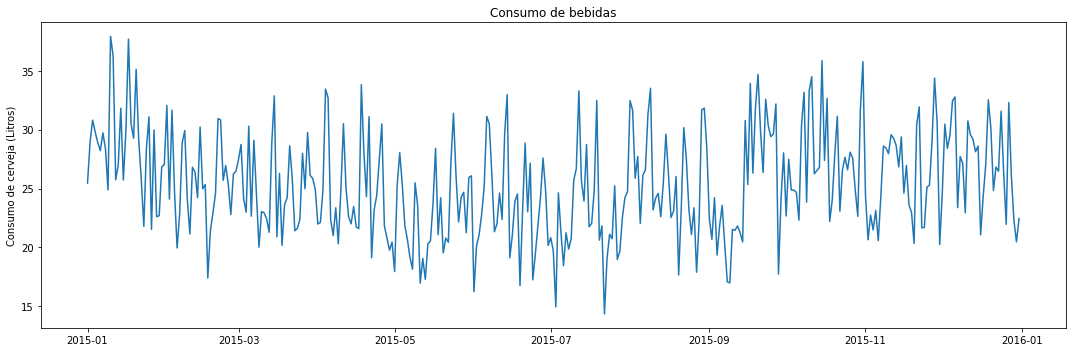

In [ ]:
plt.figure(figsize=(15,5))

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-');
plt.title('Consumo de bebidas')
plt.ylabel('Consumo de cerveja (Litros)')

plt.tight_layout()
plt.show()

#### Gráfico mostrando as flutuações das variáveis ao longo do tempo

O ideal é conseguir visualizar estas 4:
- temp_max
- temp_med
- temp_min
- consumo

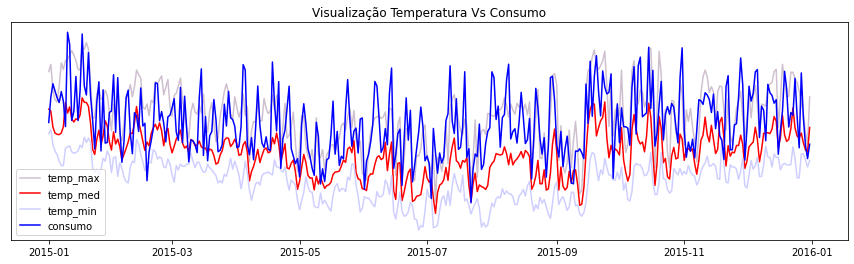

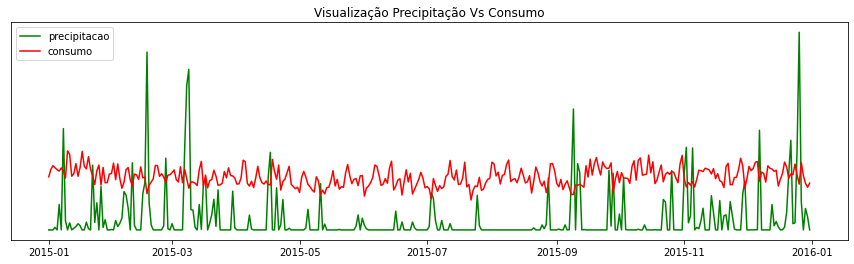

In [ ]:
plt.figure(figsize=(15,4))
plt.gca().axes.get_yaxis().set_visible(False)
plt.plot_date(x='data',y='temp_max',data=df_clean,fmt='-',c='#CFC0D0');
plt.plot_date(x='data',y='temp_med',data=df_clean,fmt='-',c='r');
plt.plot_date(x='data',y='temp_min',data=df_clean,fmt='-',c='#CFCFFF');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='#0000FF');
plt.title("Visualização Temperatura Vs Consumo")
plt.legend()



plt.figure(figsize=(15,4))
plt.plot_date(x='data',y='precipitacao',data=df_clean,fmt='-',c='g');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='r');
plt.title("Visualização Precipitação Vs Consumo")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()

#### Gráfico de correlação

consumo         1.000000
temp_max        0.642672
temp_med        0.574615
fimsemana       0.505981
temp_min        0.392509
precipitacao   -0.193784
Name: consumo, dtype: float64


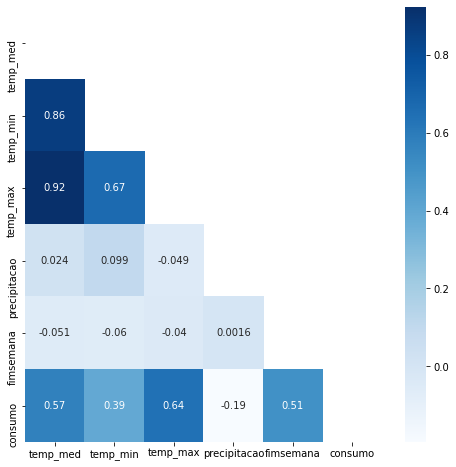

In [ ]:
print(df_clean.corr()['consumo'].sort_values(ascending = False) )

correlation = df_clean.corr()

f, ax = plt.subplots(figsize=(8, 8))

# Cria uma máscara para camuflar a parte de cima do mapa

mask = np.triu(np.ones_like(correlation,dtype=bool))

# Plot do mapa de calor

sns.heatmap(correlation,cmap='Blues',mask=mask, square=False,annot=True);

### 4 - 5 Separar conjunto de Treino e Teste

In [ ]:
# Separando o conjunto de dados em variáveis e target

X = df_clean[['data', 'temp_med', 'temp_min', 'temp_max', 'precipitacao', 'fimsemana']]
y = df_clean[['consumo']]

# Criação da amostra para treino e testes

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=75)

In [ ]:
X_train.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana
227,2015-08-16,20.56,16.2,27.2,0.0,1
7,2015-01-08,24.90,19.5,32.8,48.6,0
339,2015-12-06,23.12,20.6,28.0,0.1,1
354,2015-12-21,23.12,19.6,29.1,27.2,0
191,2015-07-11,17.46,16.0,19.8,0.0,1


### 4 - 6 Criar os transformadores e transformar os dados (Separado)

A coluna **data** é apenas um indíce que nos auxilia a visualizar a evolução do consumo ao longo do tempo, porém ela não é utilizada nos transformadores e nem no treinamento / validação do modelo.

#### Criar os transformadores

In [ ]:
# Chamar os modelos de transformação
min_max = MinMaxScaler()
norm = StandardScaler()

#### Treinar o StandardScaler()

In [ ]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
for i in X_train_norm.columns:
  if i == 'data':
    pass
  else: 
    X_train_norm[i] = norm.fit_transform(X_train_norm[i].values.reshape(-1,1))
    X_test_norm[i] = norm.transform(X_test_norm[i].values.reshape(-1,1))

X_train_norm.head()


,data,temp_med,temp_min,temp_max,precipitacao,fimsemana
227,2015-08-16,-0.278386,-0.512593,0.084390,-0.425067,1.586843
7,2015-01-08,1.116713,0.680485,1.408720,3.231927,-0.630182
339,2015-12-06,0.544529,1.078178,0.273580,-0.417542,1.586843
354,2015-12-21,0.544529,0.716639,0.533717,1.621646,-0.630182
191,2015-07-11,-1.274884,-0.584900,-1.665617,-0.425067,1.586843


#### Treinar o MinMaxScaler()

In [ ]:
X_train_min_max = X_train.copy()
X_test_min_max = X_test.copy()
for i in X_train_min_max.columns:
  if i == 'data':
    pass
  else:
    X_train_min_max[i] = min_max.fit_transform(X_train_min_max[i].values.reshape(-1,1))
    X_test_min_max[i] = min_max.transform(X_test_min_max[i].values.reshape(-1,1))

X_train_min_max.head()


,data,temp_med,temp_min,temp_max,precipitacao,fimsemana
227,2015-08-16,0.479950,0.385185,0.596244,0.000000,1.0
7,2015-01-08,0.751880,0.629630,0.859155,0.512658,0.0
339,2015-12-06,0.640351,0.711111,0.633803,0.001055,1.0
354,2015-12-21,0.640351,0.637037,0.685446,0.286920,0.0
191,2015-07-11,0.285714,0.370370,0.248826,0.000000,1.0


### 4 - 7 Treinar e validar o modelo para os dados limpos (Sem transformação)

Lembrar de excluir a coluna de data para treinar o modelo

In [ ]:
# Chamar o modelo
LinReg = LinearRegression()

# Treinar o modelo
LinReg.fit(X_train.iloc[:,1:],y_train,)

# Predizer os valores de teste
y_pred = LinReg.predict(X_test.iloc[:,1:])


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg.intercept_,LinReg.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))


Fórmula: y = [6.16138335] [ 0.05198575 -0.03504732  0.6617024  -0.05541184  5.18728834] x
MSE: 1.924742515006981
RMSE: 4.955697851338494
R²: 0.703522680268547


### 4 - 8 Treinar e validar o modelo para os dados com MinMaxScaler

Lembrar de excluir a coluna de data para treinar o modelo

In [ ]:
# Chamar o modelo
LinReg_mim_max = LinearRegression()

# Treinar o modelo
LinReg_mim_max.fit(X_train_min_max.iloc[:,1:],y_train)

# Predizer os valores de teste
y_pred = LinReg_mim_max.predict(X_test_min_max.iloc[:,1:])


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg_mim_max.intercept_,LinReg_mim_max.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))


Fórmula: y = [16.04116379] [ 0.82969252 -0.47313884 14.09426118 -5.25304253  5.18728834] x
MSE: 1.9247425150069795
RMSE: 4.955697851338488
R²: 0.7035226802685475


### 4 - 9 Treinar e validar o modelo para os dados com StandardScaler()

Lembrar de excluir a coluna de data para treinar o modelo

In [ ]:
# Chamar o modelo
LinReg_norm = LinearRegression()

# Treinar o modelo
LinReg_norm.fit(X_train_norm.iloc[:,1:],y_train,)

# Predizer os valores de teste
y_pred = LinReg_norm.predict(X_test_norm.iloc[:,1:])


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg_norm.intercept_,LinReg_norm.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))


Fórmula: y = [25.58140068] [ 0.16172206 -0.0969393   2.7980446  -0.73640132  2.33975146] x
MSE: 1.9247425150069803
RMSE: 4.955697851338492
R²: 0.7035226802685473


#

In [ ]:
# Montar dataframes com as informações gerais e previsões em todos os casos
df = X.copy()
df['consumo_real'] = y
df['consumo_previsto'] = LinReg.predict(X.iloc[:,1:])
df.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,28.248291
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,28.874409
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,31.638800
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,30.699967
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,25.389868


In [ ]:
df_min_max = X.copy()
for i in df_min_max.columns:
  if i == 'data':
    pass
  else:
    min_max.fit(X_train[i].values.reshape(-1,1))
    df_min_max[i] = min_max.transform(df_min_max[i].values.reshape(-1,1))


df_min_max['consumo_real'] = y
df_min_max['consumo_previsto'] = LinReg_mim_max.predict(df_min_max.iloc[:,1:-1])
df_min_max.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,0.902256,0.955556,0.845070,0.000000,0.0,25.461,28.248291
1,2015-01-02,0.884712,1.000000,0.892019,0.000000,0.0,28.972,28.874409
2,2015-01-03,0.746867,0.844444,0.723005,0.000000,1.0,30.814,31.638800
3,2015-01-04,0.694236,0.777778,0.661972,0.012658,1.0,29.799,30.699967
4,2015-01-05,0.684211,0.740741,0.647887,0.000000,0.0,28.900,25.389868


In [ ]:
df_norm = X.copy()
for i in df_norm.columns:
  if i == 'data':
    pass
  else:
    norm.fit(X_train[i].values.reshape(-1,1))
    df_norm[i] = norm.transform(df_norm[i].values.reshape(-1,1))


df_norm['consumo_real'] = y
df_norm['consumo_previsto'] = LinReg_norm.predict(df_norm.iloc[:,1:-1])
df_norm.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,1.888195,2.271256,1.337774,-0.425067,-0.630182,25.461,28.248291
1,2015-01-02,1.798189,2.488180,1.574261,-0.425067,-0.630182,28.972,28.874409
2,2015-01-03,1.090996,1.728948,0.722906,-0.425067,1.586843,30.814,31.638800
3,2015-01-04,0.820977,1.403563,0.415473,-0.334771,1.586843,29.799,30.699967
4,2015-01-05,0.769545,1.222794,0.344527,-0.425067,-0.630182,28.900,25.389868


In [ ]:
df_min_max.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,0.902256,0.955556,0.845070,0.000000,0.0,25.461,28.248291
1,2015-01-02,0.884712,1.000000,0.892019,0.000000,0.0,28.972,28.874409
2,2015-01-03,0.746867,0.844444,0.723005,0.000000,1.0,30.814,31.638800
3,2015-01-04,0.694236,0.777778,0.661972,0.012658,1.0,29.799,30.699967
4,2015-01-05,0.684211,0.740741,0.647887,0.000000,0.0,28.900,25.389868


In [ ]:
df_norm.head

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,1.888195,2.271256,1.337774,-0.425067,-0.630182,25.461,28.248291
1,2015-01-02,1.798189,2.488180,1.574261,-0.425067,-0.630182,28.972,28.874409
2,2015-01-03,1.090996,1.728948,0.722906,-0.425067,1.586843,30.814,31.638800
3,2015-01-04,0.820977,1.403563,0.415473,-0.334771,1.586843,29.799,30.699967
4,2015-01-05,0.769545,1.222794,0.344527,-0.425067,-0.630182,28.900,25.389868


### 4 - 10 Criar gráficos de comparação dos modelos

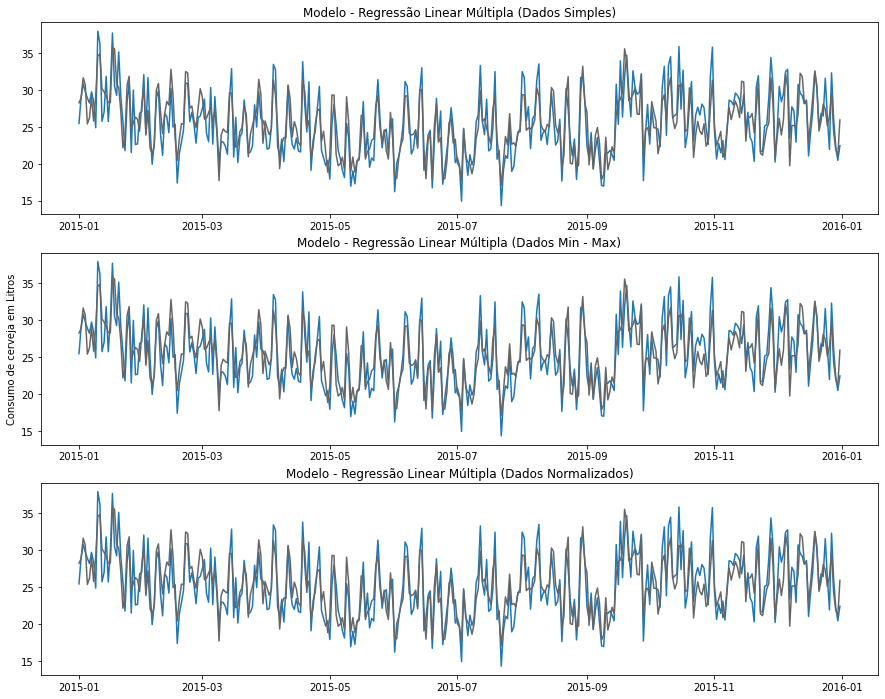

In [ ]:
plt.figure(figsize=(15,12))

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,1)
plt.plot_date(x='data',y='consumo_real',data=df,fmt='-')
plt.plot_date(x='data',y='consumo_previsto',data=df,fmt='-',color='#666666')
plt.title('Modelo - Regressão Linear Múltipla (Dados Simples)')

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,2)
plt.plot_date(x='data',y='consumo_real',data=df_min_max,fmt='-')
plt.plot_date(x='data',y='consumo_previsto',data=df_min_max,fmt='-',color='#666666')
plt.title('Modelo - Regressão Linear Múltipla (Dados Min - Max)')
plt.ylabel('Consumo de cerveja em Litros')

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,3)
plt.plot_date(x='data',y='consumo_real',data=df_norm,fmt='-')
plt.plot_date(x='data',y='consumo_previsto',data=df_min_max,fmt='-',color='#666666')
plt.title('Modelo - Regressão Linear Múltipla (Dados Normalizados)')

plt.show()


In [ ]:
teste['dif1'] = df['consumo_previsto'] - df_min_max['consumo_previsto']
teste['dif2'] = df['consumo_previsto'] - df_norm['consumo_previsto']
teste.sort_values(by='dif1',ascending=True).head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto,dif1,dif2
265,2015-09-23,26.14,18.3,34.0,0.0,0,32.589,29.376806,0.0,0.000000e+00
338,2015-12-05,24.80,19.5,30.6,0.1,1,32.451,32.197048,0.0,0.000000e+00
39,2015-02-09,24.00,19.3,30.7,0.0,0,24.062,27.046892,0.0,3.552714e-15
280,2015-10-08,26.56,19.3,34.0,0.0,0,33.182,29.363593,0.0,-3.552714e-15
203,2015-07-23,17.02,13.6,20.6,0.0,0,19.029,20.200607,0.0,0.000000e+00
